In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path = "params/params_recovery"
filename = "recovered_coeffs"

# get all csv files from directoy that carry the name filename
files = [f for f in os.listdir(path) if filename in f and not 'model' in f]
files.sort()
print(files)

# read all csv files into a pandas dataframe by appending the column 'sindy' to the first dataframe
# initialize the dataframe with the first file
df = pd.read_csv(os.path.join(path,files[0]), index_col=0)
# remove the column sindy
df = df.drop(columns=['sindy'])

for file in files:
    # get beta value from filename
    beta = file.split("beta")[1].split(".")[0]
    df['sindy_beta' + beta] = pd.read_csv(os.path.join(path,file))['sindy'].values

['recovered_coeffs_beta1.csv', 'recovered_coeffs_beta2.csv', 'recovered_coeffs_beta3.csv', 'recovered_coeffs_beta4.csv', 'recovered_coeffs_beta5.csv']


{1: 0.126125, 2: 0.013375000000000003, 3: 0.015124999999999996, 4: 0.039625, 5: 0.014124999999999999}


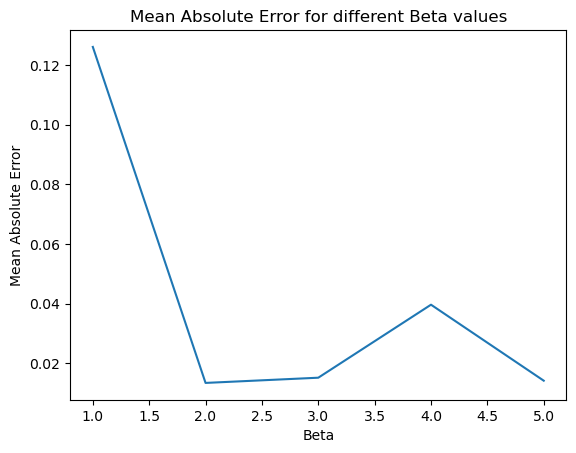

In [3]:
# compute the mae for each beta value
mae = {}
for beta in df.columns[1:]:
    mae[int(beta.split("beta")[1])] = np.mean(np.abs(df['groundtruth'] - df[beta]))
    
print(mae)

# plot mae for each beta value
plt.plot(mae.keys(), mae.values())
plt.xlabel("Beta")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error for different Beta values")
plt.show()

Correctly recovered coefficients: [18 18 17 17 17]


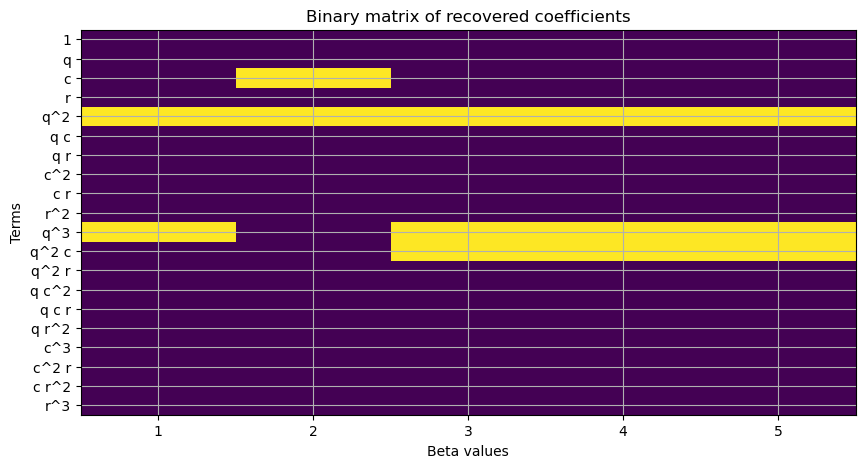

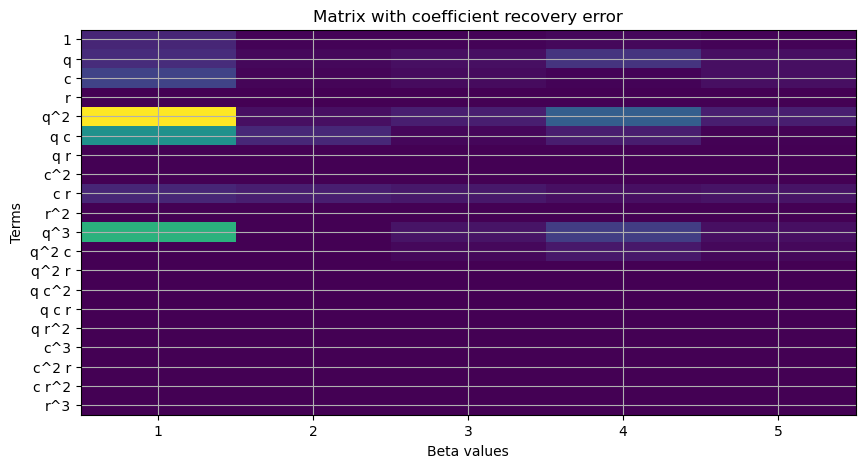

In [4]:
# Make a binary vector of the groundtruth values and the recovered values
coeffs = df.values

# replace all values that are not zero with 1
coeffs_binary = np.zeros(coeffs.shape)
for i in range(coeffs.shape[1]):
    coeffs_binary[:,i][coeffs[:,i] != 0] = 1

# calculate the number of correctly recovered coefficients by comparing with column 0
correctly_recovered = np.sum(coeffs_binary == coeffs_binary[:,0].reshape(-1,1), axis=0)
print(f'Correctly recovered coefficients: {correctly_recovered[1:]}')

# plot the matrix
plt.figure(figsize=(10,5))
plt.imshow(np.abs(coeffs_binary[:,1:] - coeffs_binary[:,0].reshape(-1, 1)), aspect='auto')
plt.xlabel("Beta values")
plt.ylabel("Terms")
plt.yticks(range(coeffs.shape[0]), df.index)
plt.xticks(range(coeffs.shape[1]-1), [c.split("beta")[1] for c in df.columns[1:]])
plt.title("Binary matrix of recovered coefficients")
plt.grid()
plt.show()

# plot the matrix
plt.figure(figsize=(10,5))
plt.imshow(np.abs(coeffs[:,1:] - coeffs[:,0].reshape(-1, 1)), aspect='auto')
plt.xlabel("Beta values")
plt.ylabel("Terms")
plt.yticks(range(coeffs.shape[0]), df.index)
plt.xticks(range(coeffs.shape[1]-1), [c.split("beta")[1] for c in df.columns[1:]])
plt.title("Matrix with coefficient recovery error")
plt.grid()
plt.show()

### MAE with STD

In [6]:
path = "params/params_recovery/"
filename = "model"

# get all csv files from directoy that carry the name filename
files = [f for f in os.listdir(path) if filename in f]
files.sort()
print(files)

# read all csv files into a pandas dataframe by appending the column 'sindy' to the first dataframe
# initialize the dataframe with the first file
df = pd.read_csv(os.path.join(path,files[0]), index_col=0)
# remove the column sindy
df = df.drop(columns=['sindy'])
beta_values = []
for file in files:
    # get beta value from filename
    beta = file.split("beta")[1].split("model")[0]
    if int(beta) not in beta_values:
        beta_values.append(int(beta))
    model = file.split("model")[1].split(".")[0]
    df['sindy_beta' + beta + '_model' + model] = pd.read_csv(os.path.join(path,file))['sindy'].values

['recovered_coeffs_beta1model1.csv', 'recovered_coeffs_beta1model2.csv', 'recovered_coeffs_beta1model3.csv', 'recovered_coeffs_beta1model4.csv', 'recovered_coeffs_beta1model5.csv', 'recovered_coeffs_beta2model1.csv', 'recovered_coeffs_beta2model2.csv', 'recovered_coeffs_beta2model3.csv', 'recovered_coeffs_beta2model4.csv', 'recovered_coeffs_beta2model5.csv', 'recovered_coeffs_beta3model1.csv', 'recovered_coeffs_beta3model2.csv', 'recovered_coeffs_beta3model3.csv', 'recovered_coeffs_beta3model4.csv', 'recovered_coeffs_beta3model5.csv', 'recovered_coeffs_beta4model1.csv', 'recovered_coeffs_beta4model2.csv', 'recovered_coeffs_beta4model3.csv', 'recovered_coeffs_beta4model4.csv', 'recovered_coeffs_beta4model5.csv', 'recovered_coeffs_beta5model1.csv', 'recovered_coeffs_beta5model2.csv', 'recovered_coeffs_beta5model3.csv', 'recovered_coeffs_beta5model4.csv', 'recovered_coeffs_beta5model5.csv']


In [ ]:
df

,groundtruth,sindy_beta1_model1,sindy_beta1_model2,sindy_beta1_model3,sindy_beta1_model4,sindy_beta1_model5,sindy_beta2_model1,sindy_beta2_model2,sindy_beta2_model3,sindy_beta2_model4,...,sindy_beta4_model1,sindy_beta4_model2,sindy_beta4_model3,sindy_beta4_model4,sindy_beta4_model5,sindy_beta5_model1,sindy_beta5_model2,sindy_beta5_model3,sindy_beta5_model4,sindy_beta5_model5
term,,,,,,,,,,,,,,,,,,,,,
1,0.0500,0.06,0.04,0.18,0.16,0.09,0.04,0.04,0.03,0.20,...,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05
q,0.9000,1.34,0.98,0.84,0.98,0.79,0.94,0.96,0.97,0.95,...,0.91,0.92,0.91,0.90,0.92,0.91,0.94,0.91,0.92,0.87
c,-0.0125,-0.08,-0.02,-0.31,-0.24,-0.11,-0.04,-0.04,-0.04,-0.34,...,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05
r,0.0000,-0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
q^2,0.0000,-1.29,-0.16,-0.67,-0.96,0.05,-0.10,-0.13,-0.13,-1.06,...,-0.04,-0.04,0.00,0.00,-0.05,-0.03,-0.08,-0.03,-0.03,0.05
q c,-0.2250,-0.17,-0.39,0.71,0.45,0.19,-0.23,-0.27,-0.26,0.73,...,-0.25,-0.23,-0.23,-0.23,-0.22,-0.23,-0.24,-0.22,-0.23,-0.22
q r,0.0000,0.11,0.00,0.00,-0.04,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
c^2,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
c r,0.2500,0.12,0.33,0.15,0.20,0.18,0.30,0.31,0.32,0.19,...,0.34,0.32,0.32,0.33,0.31,0.32,0.31,0.31,0.32,0.33


In [13]:
# get mean parameters per beta value for all sindy columns
beta_mean = {}
num_models = 5
num_params = df.shape[0]
for beta in beta_values:
    beta_mean[beta] = np.zeros(num_params)
    
for col in df.columns:
    if 'sindy' in col:
        for beta in beta_values:
            if 'beta' + str(beta) in col:
                beta_mean[beta] += np.array(df[col])

# calc mean
for beta in beta_values:
    beta_mean[beta] /= num_models
    
# calc mae for mean parameters
mae_mean_params = {}
for beta in beta_values:
    mae_mean_params[beta] = np.mean(np.abs(df['groundtruth']-beta_mean[beta]))

{1: [0.164125, 0.035125, 0.16112500000000002, 0.15912500000000002, 0.052625], 2: [0.015624999999999995, 0.022125, 0.022125, 0.19612500000000002, 0.029125], 3: [0.021124999999999998, 0.009625000000000002, 0.009625, 0.013125000000000003, 0.023625], 4: [0.011625000000000002, 0.010125000000000002, 0.006125000000000001, 0.006125000000000001, 0.010125], 5: [0.008625, 0.014624999999999996, 0.008125, 0.008125000000000002, 0.011125000000000001]}


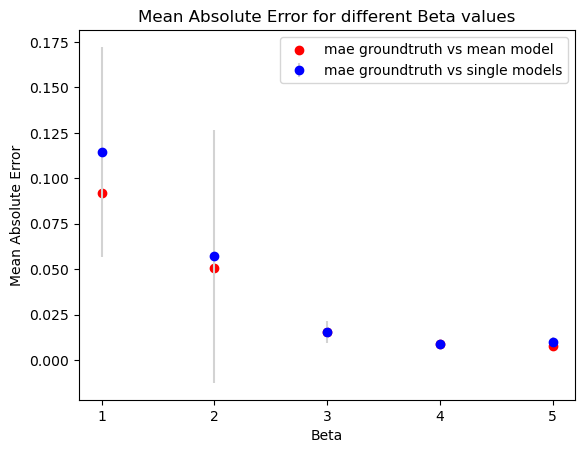

In [19]:
# compute the mae for each beta value
mae = {}
# add key for each beta
for beta in beta_values:
    mae[beta] = []
    
for key in df.columns[1:]:
    beta = int(key.split("beta")[1].split("_model")[0])
    mae[beta].append(np.mean(np.abs(df['groundtruth'] - df[key])))
    
print(mae)

# get mean and std error for each beta value in mae
mae_mean = {key: np.mean(mae[key]) for key in mae.keys()}
mae_std = {key: np.std(mae[key]) for key in mae.keys()}

# plot mae_mean and std for each beta value with mean as dot in blue and std as errorbar in lightgrey
plt.errorbar(beta_values, list(mae_mean.values()), yerr=list(mae_std.values()), fmt='o', color='blue', ecolor='lightgrey')
plt.scatter(beta_values, list(mae_mean_params.values()), color='red')
plt.xlabel("Beta")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error for different Beta values")
plt.xticks(list(mae_mean.keys()))
plt.legend(['mae groundtruth vs mean model', 'mae groundtruth vs single models'])
plt.show()

Looks good! Ensemble RNNs could be one solution towards handling noisy data!